In [1]:
from sklearn.datasets import load_digits   # importa la función load_digits
digits = load_digits()# carga digitos y l llama digitos

In [2]:
print(digits.keys())   # muestra etiquetas de digits

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [3]:
print(digits.DESCR)    # imprime la descripción del dataset

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [4]:
index = 0   # guarda el 0 en variable 'index'

In [5]:
image = digits.images[index]  # extrae imagen del número de index
label = digits.target[index]  # extrae el dígito que representa esa imagen

In [6]:
print(image)  # matriz de imagen seleccionada

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


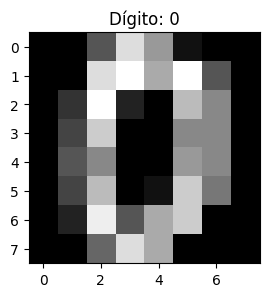

In [7]:
import matplotlib.pyplot as plt # ejecuta librería para hacer gráficos
plt.figure(figsize=(3, 3))  # genera la figura
plt.imshow(image, cmap=plt.cm.gray) # dibuja matriz 8×8 en escala de grises
plt.title(f'Dígito: {label}') # escribe el título Dígito: X, el cual es el valor de etiqueta
plt.show()  # muestra la ventana con el dibujo

In [8]:
import tensorflow as tf  # carga motor de redes neuronales)
from sklearn.model_selection import train_test_split # activa funcion para clasificar datos por prueba y entrenamiento
from tensorflow.keras.utils import to_categorical    # activa función para convertir etiquetas a 1 0 y 1

# divides datos: 80 % para entrenar y 20 % para probar
X_train, X_test, y_train, y_test = train_test_split(
    digits.data,        # matriz con píxeles aplanados
    digits.target,      # vector con etiquetas 0-9
    test_size=0.2,      # proporción reservada para test
    random_state=42     # semilla para que la partición sea reproducible
)

# convierte etiquetas en 0 y 1
y_train = to_categorical(y_train, num_classes=10)
y_test  = to_categorical(y_test,  num_classes=10)

In [9]:
print(X_train.shape)  # muestra num del conjunto de entrenamiento
print(X_test.shape)   # muestra num del conjunto de prueba

(1437, 64)
(360, 64)


In [10]:
reshaped_tensor = tf.reshape(X_train[0], shape=(8, 8)) # toma muestra y la ordena en una matriz vec(64)
print(reshaped_tensor) # imprime esa matriz y muestra el dibujo en formato numérico (8x8)

tf.Tensor(
[[ 0.  0.  3. 14.  1.  0.  0.  0.]
 [ 0.  0. 12. 12.  0.  0.  0.  0.]
 [ 0.  3. 16.  6.  0.  0.  0.  0.]
 [ 0.  5. 16.  2.  0.  0.  0.  0.]
 [ 0.  6. 16.  2.  5.  2.  0.  0.]
 [ 0.  4. 16.  2. 12. 15.  2.  0.]
 [ 0.  1. 14. 13.  2. 13. 11.  0.]
 [ 0.  0.  3. 11. 16. 13.  4.  0.]], shape=(8, 8), dtype=float64)


In [11]:
from sklearn.preprocessing import StandardScaler  # activa el procesador restando la media y divide entre la desviación estándar
scaler = StandardScaler()    # crea el objeto escalador
X_train = scaler.fit_transform(X_train) # ajusta (calc. media y std desv) con datos de entrenamiento y los transforma
X_test  = scaler.transform(X_test) # usa media,std desv y escalar datos de prueba

In [12]:
# Reconstruye imagen con vector estandarizado
reshaped_tensor = tf.reshape(X_train[0], shape=(8, 8))
# Multiplica por 100, reduce decimales divide entre 100, dejando 2 decimales
reshaped_tensor = tf.floor(reshaped_tensor * 100) / 100
print(reshaped_tensor)   # muestra matriz a 2 decimales

tf.Tensor(
[[ 0.   -0.35 -0.47  0.5  -2.55 -1.04 -0.41 -0.14]
 [-0.07 -0.62  0.3   0.   -2.19 -1.36 -0.53 -0.14]
 [-0.05  0.12  1.08 -0.2  -1.17 -1.28 -0.56 -0.12]
 [-0.04  0.86  1.13 -1.17 -1.61 -1.29 -0.63 -0.05]
 [ 0.    1.09  1.34 -1.13 -0.91 -1.14 -0.82  0.  ]
 [-0.07  0.82  1.39 -0.83  0.69  1.17 -0.34 -0.1 ]
 [-0.04  0.15  1.14  0.64 -1.43  0.68  1.47 -0.22]
 [-0.03 -0.31 -0.5  -0.25  0.84  1.05  0.45 -0.2 ]], shape=(8, 8), dtype=float64)


In [13]:
# Convierte vector  64,en matriz 8×8 tratarlosmostrar como imágene 2-D
X_train = tf.reshape(X_train, (X_train.shape[0], 8, 8))  # forma: (muestras_entren, 8, 8)
X_test  = tf.reshape(X_test,  (X_test.shape[0],  8, 8))  # forma: (muestras_prueba,  8, 8)

In [14]:
from tensorflow.keras.models import Sequential  # activa modelos secuenciales
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D  # importa las capaspara a apilar

# crea la red neuronal convolucional capa por capa
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(8, 8, 1)),  # 32 filtros 3×3, ReLU, espera imágenes 8×8x1
    MaxPooling2D(pool_size=(2, 2)),                                            # reduce a la mitad cada dimensión espacial → 3×3×32
    Flatten(),                                                                 # aplana la salida en un vector
    Dense(128, activation='relu'),                                             # capa densa de 128 neuronas con ReLU
    Dense(10, activation='softmax')                                            # capa de salida: 10 neuronas con softmax
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
from tensorflow.keras.optimizers import Adam  # optimizador Adam

learning_rate = 0.001 # tasa de aprendizaje, regula el tamaño de paso en actualizaciónes de pesos
adam_optimizer = Adam(learning_rate=learning_rate)  # optimizador Adam con la tasa elegida

In [16]:
model.compile(
    optimizer='adam', #optimizador Adam, ajusta pesos, en entrenamiento)
    loss='categorical_crossentropy',  # función de pérdida para clasificar multiclase con etiquetas 1 y 0
    metrics=['accuracy'] # evalúa % de aciertos en cada época
)

In [17]:
history = model.fit(
    X_train, y_train, # datos de entrenamiento (imágenes y etiquetas 1 y 0)
    epochs=50,             # veces que verá el conjunto
    batch_size=32,         # muestras procesadas antes de actualizar pesos
    validation_split=0.2   # reserva 20 % entrenamiento para validar cada época
)

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.3620 - loss: 2.0097 - val_accuracy: 0.8229 - val_loss: 1.0053
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8784 - loss: 0.7308 - val_accuracy: 0.8785 - val_loss: 0.4606
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9434 - loss: 0.3028 - val_accuracy: 0.9271 - val_loss: 0.2831
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9508 - loss: 0.2007 - val_accuracy: 0.9410 - val_loss: 0.2142
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9741 - loss: 0.1306 - val_accuracy: 0.9444 - val_loss: 0.1882
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9781 - loss: 0.1110 - val_accuracy: 0.9653 - val_loss: 0.1505
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9848 - loss: 0.0818 - val_accuracy: 0.9618 - val_loss: 0.1297
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9919 - loss: 0.0630 - val_accuracy: 0.9653 - val_loss

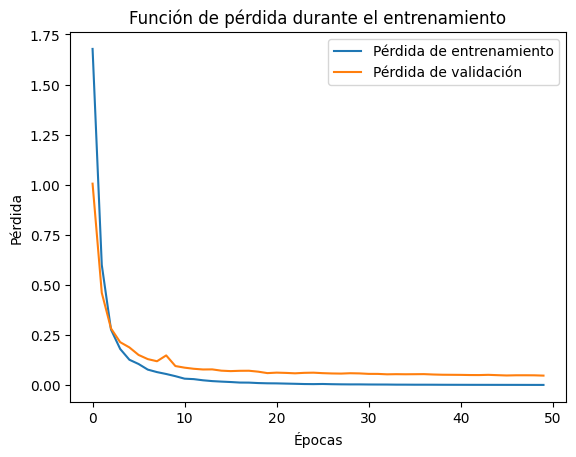

In [18]:
import matplotlib.pyplot as plt # importa la librería para graficar

plt.plot(history.history['loss'], label='Pérdida de entrenamiento') # curva de pérdida de datos de entrenamiento
plt.plot(history.history['val_loss'], label='Pérdida de validación')  # curva de pérdida de datos de validación
plt.xlabel('Épocas')   # etiqueta eje horizontal
plt.ylabel('Pérdida') # etiqueta eje vertical
plt.legend() # leyenda de las líneas
plt.title('Función de pérdida durante el entrenamiento')# título gráfico
plt.show() #muestra figura

In [19]:
loss, accuracy = model.evaluate(X_test, y_test)# calcula pérdida y precisión en conjunto de prueba
print(f'Loss: {loss}, Accuracy: {accuracy}')# muestra resultados: pérdida y % de aciertos

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9857 - loss: 0.0290  
Loss: 0.02824988402426243, Accuracy: 0.9861111044883728


In [20]:
import numpy as np   # Para manipular tensores
from sklearn.metrics import confusion_matrix, recall_score  # importa métricas de evaluación

y_pred = model.predict(X_test)   # predice probabilidades para cada clase sobre el conjunto de prueba
y_pred_classes = np.argmax(y_pred, axis=1)   # convierte probabilidades a clase predicciones

y_test_classes = np.argmax(y_test, axis=1)   # convierte etiquetas 1 y 0 a clase real

conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)  # matriz de confusión: filas=real, columnas=predicción
sensitivity = recall_score(y_test_classes, y_pred_classes, average=None)  # sensibilidad por dígito

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


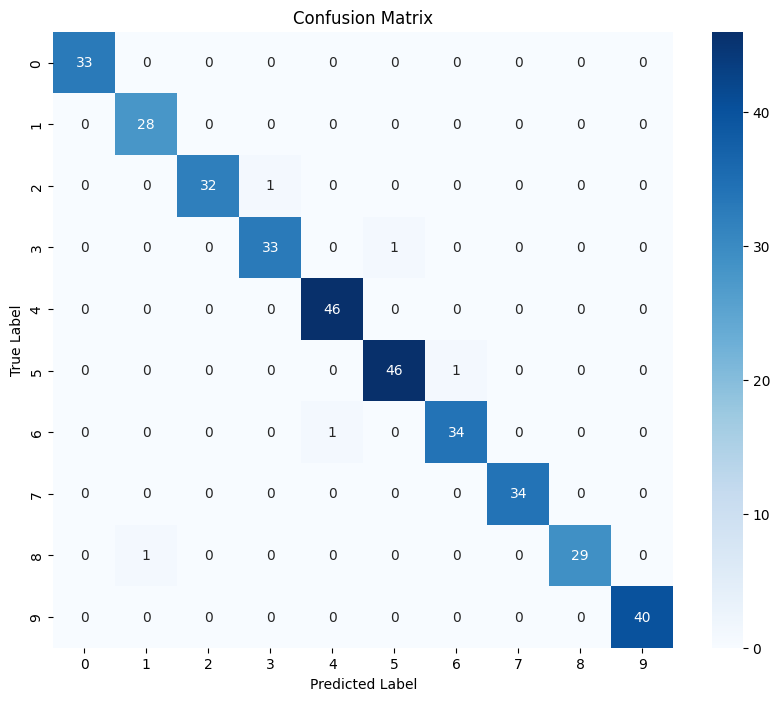

Sensitivity (Recall) for each class:
Class 0: 1.0
Class 1: 1.0
Class 2: 0.9696969696969697
Class 3: 0.9705882352941176
Class 4: 1.0
Class 5: 0.9787234042553191
Class 6: 0.9714285714285714
Class 7: 1.0
Class 8: 0.9666666666666667
Class 9: 1.0


In [21]:
import seaborn as sns  # gráficos estadísticos
import matplotlib.pyplot as plt # muesra figura

# dibuja la matriz de confusión como mapa de calor
plt.figure(figsize=(10, 8))  # tamaño del gráfico
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')  # mapa de calor con enteros y paleta azul
plt.xlabel('Predicted Label')# eje X
plt.ylabel('True Label')# eje Y
plt.title('Confusion Matrix') # título gráfico
plt.show() # muestra figura
# imprime sensibilidad de cada dígito
print('Sensitivity (Recall) for each class:')
for i in range(10):
    print(f'Class {i}: {sensitivity[i]}')

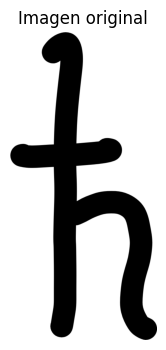

In [22]:
from PIL import Image               # Pillow abre y manipula imágenes
import matplotlib.pyplot as plt     #Matplotlib para visualizar

ruta = "/content/h barra.png"       # ruta de la imagen a cargar
img = Image.open(ruta).convert("L")  # abre la imagen y convierte a escala de grises

# muestra la imagen original
plt.figure(figsize=(4, 4))          # tamaño de la figura 4×4 pulgadas
plt.imshow(img, cmap="gray")        # dibuja la imagen en escala de grises
plt.title("Imagen original")        # título del gráfico
plt.axis("off")                     # oculta los ejes
plt.show()                          # despliega la figura

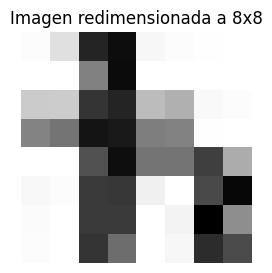

In [23]:
import matplotlib.pyplot as plt      # pyplot muestra imagen

# cambia el tamaño mejorando calidad
img_resized = img.resize((8, 8), Image.Resampling.LANCZOS)

# muestra imagen
plt.figure(figsize=(3, 3))  # figura 3,3
plt.imshow(img_resized, cmap="gray") # escala de grises
plt.title("Imagen redimensionada a 8x8") # título
plt.axis("off") # quita ejes
plt.show()# muestra figura
img_resized.save("imagen_8x8.png")# guarda imagen

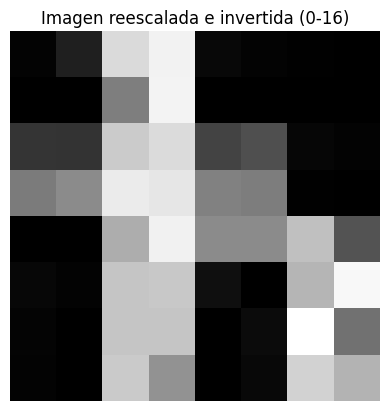

In [24]:
import matplotlib.pyplot as plt   # muestra imagen
import numpy as np                # trabaja con vectores

# convierte la imagen a vectores flotantes y reescala
img_array = np.array(img_resized).astype("float32")  # valores ahora entre 0 y 255
img_array = 16 - (img_array / 255 * 16) # invierte y lleva al rango 0-16 (negro=0, blanco=16)

# visualiza el resultado
plt.imshow(img_array, cmap="gray") # dibuja en escala de grises
plt.title("Imagen reescalada e invertida (0-16)")    # título
plt.axis("off")       # sin ejes
plt.show()        # muestra figura

In [25]:
from sklearn.preprocessing import StandardScaler

# normalizar
scaler = StandardScaler()
img_flat = img_array
img_scaled = scaler.fit_transform(img_flat)

# Dar forma (1,8,8) que es el input del modelo
img_tensor = img_scaled.reshape(1, 8, 8)

In [26]:
from sklearn.preprocessing import StandardScaler  # escalador

# aplana la imagen 8×8 a vector de 64 píx y normaliza con media 0 y std dev 1
scaler = StandardScaler() # escala
img_flat = img_array.reshape(-1, 1) # convierte 8×8 en columna 64×1
img_scaled = scaler.fit_transform(img_flat) # normaliza y devuelte vector
# convierte 8×8 y añade dimensión extra → shape (1, 8, 8)
img_tensor = img_scaled.reshape(1, 8, 8) # lista que alimenta modelo

In [27]:
pred = model.predict(img_tensor)
digit = np.argmax(pred)
print("Predicción:", digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicción: 8


In [28]:
pred = model.predict(img_tensor)  # muestra imagen y obtiene probabilidad para cada dígito
digit = np.argmax(pred) # devuelve índice con mayor probabil

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
